In [1]:
import torch
import torchvision.models as models
import torch.optim as optim
from torchsummary import summary
import torchvision.transforms as transforms
import torch.nn as nn
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [6]:
model = models.vgg19(pretrained=True)

d:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
d:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
# 打印整个模型的结构
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
style_name_2_index = {
    "conv1_1" : '0',
    "conv2_1" : '5',
    "conv3_1" : '10',
    "conv4_1" : '19',
    "conv5_1" : '28'
}

style_index_2_name = {
    '0' : "conv1_1",
    '5' : "conv2_1",
    '10' : "conv3_1",
    '19' : "conv4_1",
    '28' : "conv5_1"
}

style_weight_dict = {
    "conv1_1" : 0.2,
    "conv2_1" : 0.2,
    "conv3_1" : 0.2,
    "conv4_1" : 0.2,
    "conv5_1" : 0.2
}

cont_name_2_index = {
    "conv4_2" : '21'
}

cont_index_2_name = {
    '21' : "conv4_2"
}

gen_name_2_index = {
    "conv1_1" : '0',
    "conv2_1" : '5',
    "conv3_1" : '10',
    "conv4_1" : '19',
    "conv4_2" : '21',
    "conv5_1" : '28'
}

gen_index_2_name = {
    '0' : "conv1_1",
    '5' : "conv2_1",
    '10' : "conv3_1",
    '19' : "conv4_1",
    '21' : "conv4_2",
    '28' : "conv5_1"
}


In [4]:
style_name_2_index.values()

dict_values(['0', '5', '10', '19', '28'])

In [8]:
summary(model.cuda(), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [17]:
# 加载图像并进行预处理
model = model.cuda()
input_image = Image.open("images/hong_kong.jpg").convert("RGB")
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0).cuda()

outputs = {}
x = input_batch
for name, module in model.features.named_children():
    x = module(x)
    if name in style_name_2_index.values():
        str_name = style_index_2_name[name]
        outputs[str_name] = x
    

In [52]:
input_image = Image.open("ex.jpg").convert("RGB")
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0).cuda()

(4032, 3024)


In [19]:
input_batch = torch.tensor(input_batch, requires_grad=True)
input_batch

d:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[[[0.9646, 0.9474, 0.9474,  ..., 1.2728, 1.2899, 1.2899],
          [1.1187, 1.1015, 0.9817,  ..., 1.2899, 1.2728, 1.2728],
          [1.1015, 1.1358, 1.0844,  ..., 1.2728, 1.2728, 1.2728],
          ...,
          [0.2111, 0.3138, 0.2282,  ..., 1.4269, 1.4612, 1.4612],
          [0.1939, 0.2624, 0.2282,  ..., 1.4440, 1.4269, 1.4612],
          [0.1426, 0.1426, 0.1426,  ..., 1.3927, 1.4098, 1.4269]],

         [[1.4832, 1.4482, 1.4482,  ..., 1.7108, 1.7283, 1.7283],
          [1.5882, 1.5882, 1.4657,  ..., 1.7283, 1.7108, 1.7108],
          [1.6057, 1.6408, 1.5707,  ..., 1.7108, 1.6933, 1.6933],
          ...,
          [0.3627, 0.4678, 0.3803,  ..., 1.3606, 1.3957, 1.3957],
          [0.3452, 0.4153, 0.3803,  ..., 1.3782, 1.3606, 1.3957],
          [0.2927, 0.2927, 0.2927,  ..., 1.3256, 1.3431, 1.3606]],

         [[2.2566, 2.2217, 2.2217,  ..., 2.3263, 2.3437, 2.3437],
          [2.3437, 2.3437, 2.2566,  ..., 2.3437, 2.3263, 2.3263],
          [2.3437, 2.3611, 2.3263,  ..., 2

In [20]:
input_batch.shape

torch.Size([1, 3, 224, 224])

torch.Size([1, 64, 224, 224])
torch.Size([224, 224])
torch.Size([1, 128, 112, 112])
torch.Size([112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([14, 14])


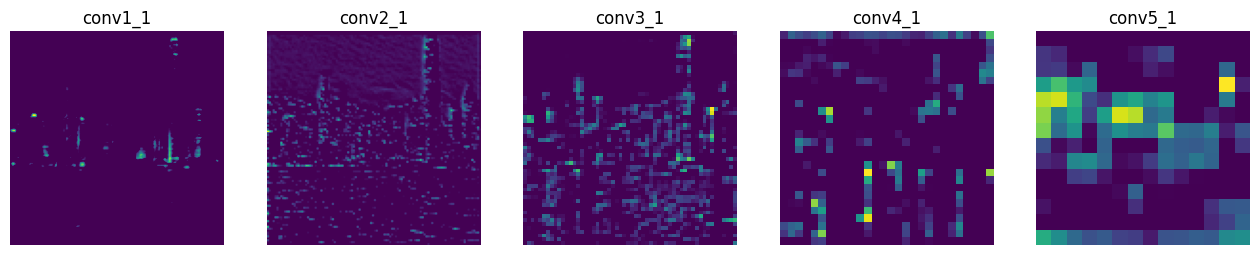

In [21]:
# 可视化输出
fig, axs = plt.subplots(1, len(outputs), figsize=(16, 4))
i = 0
for layer_name, output in outputs.items():
    output = output.cpu()
    print(output.shape)
    output = output.squeeze(0)[0,:,:]
    print(output.shape)
    output = output.detach().numpy()
    
    axs[i].imshow(output, cmap=None)
    axs[i].set_title(layer_name)
    axs[i].axis("off")
    i += 1

plt.show()

In [4]:
def load_model():
    # 加载预训练的VGG19模型
    model = models.vgg19(pretrained=True)
    
    """
    # 收集需要替换的层的名称
    layers_to_replace = []
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.MaxPool2d):
            param = [name, module.kernel_size, module.stride, module.padding, module.dilation]
            print(param)
            layers_to_replace.append(param)

    # 在迭代完成后替换层
    for param in layers_to_replace:
        # 获取MaxPooling层的参数
        name = param[0]
        kernel_size = param[1]
        stride = param[2]
        padding = param[3]
        dilation = param[4]
        # 创建AvgPooling层,并替换原始的MaxPooling层
        avg_pooling = torch.nn.AvgPool2d(kernel_size, stride, padding, dilation)
        setattr(model, name, avg_pooling)
    """

    return model

#model = load_model()
#summary(model.cuda(), input_size=(3, 224, 224))

In [7]:
vgg19 = models.vgg19(pretrained=True)

vgg19.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [4]:
class CustomVGG(nn.Module):
    def __init__(self):
        super(CustomVGG, self).__init__()
        # 加载预训练的 VGG19 模型
        vgg19 = models.vgg19(pretrained=True)
        pretrained_features = vgg19.features

        self.features = nn.Sequential()
        prev_layer = 0
        for module in pretrained_features:
            if isinstance(module, nn.MaxPool2d):
                # 将 MaxPool2d 替换为 AvgPool2d
                module = nn.AvgPool2d(kernel_size=module.kernel_size, stride=module.stride, padding=module.padding)

            self.features.add_module(str(len(self.features)), module)

            # 加载预训练模型的参数
            if not (isinstance(module, nn.MaxPool2d) or isinstance(module, nn.ReLU)):
                self.features[-1].load_state_dict(pretrained_features[int(prev_layer)].state_dict())
                
            prev_layer += 1


    def forward(self, x):
        x = self.features(x)
        return x

In [5]:
custom_vgg = CustomVGG()

d:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
d:\Anaconda\Anaconda_setup\envs\malning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
print(custom_vgg)

CustomVGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace=True)
    (18): A

In [8]:
print(vgg19)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [9]:
summary(custom_vgg.cuda(), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         AvgPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        AvgPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [10]:
for name, module in model.named_modules():
    #print(name, model)
    if isinstance(module, torch.nn.MaxPool2d):
        print(f"Layer {name} has not been replaced.")
    elif isinstance(module, torch.nn.AvgPool2d):
        print(f"Layer {name} has been replaced with AvgPooling.")

Layer features.4 has not been replaced.
Layer features.9 has not been replaced.
Layer features.18 has not been replaced.
Layer features.27 has not been replaced.
Layer features.36 has not been replaced.


In [10]:
def content_loss(gen_outputs, content_outputs, name_2_index, chosen_layer="conv4_2"):
    
    def Compute_Loss(ori_img, gen_img):
        """
        Args:
            ori_img (_type_): original image
            gen_img (_type_): generated image
        """
        
        print("ori_img shape: ",ori_img.shape)
        print("gen_img shape: ",gen_img.shape)
        
        channel, height, width = ori_img.shape
        
        # N is number of filters
        N = channel
        # M is size of channel
        M = height * width
        
        P = ori_img
        X = gen_img
        # P and X are both in shape: (channel, height, width)
        
        result = (1 / (4 * N * M)) * torch.sum((P - X)**2)
        return result
    
    key = chosen_layer
    
    ori_img = content_outputs[key]
    gen_img = gen_outputs[key]
        
    # here output of certain layer is in shape
    # [batch_size, channels, height, width]
    # and in fact batch_size = 1 in this task
    # so we should squeeze the first dimension
    ori_img = ori_img.squeeze(0)
    gen_img = gen_img.squeeze(0)
    
    loss = Compute_Loss(ori_img, gen_img)
    return loss

In [11]:
def style_loss(gen_outputs, style_outputs, name_2_index, weight_dict):

    def Make_Gram_Matrix(R, N, M):
        """
        The gram matrix G.
        
        R(response): (channel, height, width)
        F: (channel, height*width)
        G = F @ F.t
        G: (channel, channel)
        
        """
        
        F = R.view(N, M)
        G = torch.matmul(F, F.t())
        
        return G
    
    def Compute_Loss(ori_img, gen_img):
        """
        Args:
            ori_img (_type_): original image
            gen_img (_type_): generated image
        """
        
        channel, height, width = ori_img.shape
        
        # N is number of filters
        N = channel
        # M is size of channel
        M = height * width
        
        # A is Gram matrix(style representation) of original image
        A = Make_Gram_Matrix(ori_img, N, M)
        # G is Gram matrix(style representation) of generated image
        G = Make_Gram_Matrix(gen_img, N, M)
        
        result = (1 / (4 * N**2 * M**2)) * torch.sum((G - A)**2)
        return result
    
    loss = 0 
    for key in name_2_index.keys():
        ori_img = style_outputs[key]
        gen_img = gen_outputs[key]
        
        # here output of certain layer is in shape
        # [batch_size, channels, height, width]
        # and in fact batch_size = 1 in this task
        # so we should squeeze the first dimension
        ori_img = ori_img.squeeze(0)
        gen_img = gen_img.squeeze(0)
        
        layer_loss = Compute_Loss(ori_img, gen_img)
        weight = weight_dict[key]
        loss += weight * layer_loss
        
    return loss
        

In [12]:
def Total_loss(content_loss, style_loss, alpha=1, beta=1000):
    return alpha * content_loss + beta * style_loss

def Get_loss(gen_outputs, style_outputs, content_outputs,
             style_name_2_index, style_weight_dict, cont_name_2_index,
             alpha = 1, beta = 1000):
    
    cont_loss = content_loss(gen_outputs, content_outputs, cont_name_2_index, "conv4_2")
    sty_loss = style_loss(gen_outputs, style_outputs, style_name_2_index, style_weight_dict)
    
    total_loss = Total_loss(cont_loss, sty_loss, alpha, beta)
    return total_loss

class CustomLoss(torch.nn.Module):
    def __init__(self, style_name_2_index, style_weight_dict, cont_name_2_index,
             alpha = 1, beta = 1000):
        super(CustomLoss, self).__init__()
        self.style_name_2_index = style_name_2_index
        self.style_weight_dict = style_weight_dict
        self.cont_name_2_index = cont_name_2_index
        self.alpha = alpha
        self.beta = beta

    def forward(self, gen_outputs, style_outputs, content_outputs):
        loss = Get_loss(gen_outputs, style_outputs, content_outputs,
                         self.style_name_2_index, self.style_weight_dict,
                         self.cont_name_2_index, self.alpha, self.beta)
        return loss

In [35]:
raw_image = Image.open("images/hongkong.jpg").convert("RGB")
print(raw_image.size)
raw_image = np.array(raw_image).astype('float32').transpose((2, 0, 1))
print(raw_image.shape)

(800, 600)
(3, 600, 800)


In [36]:
image = Image.fromarray(raw_image.transpose(1,2,0).astype("uint8"), mode='RGB')
image.show()

In [73]:
gen_img = Init_Gen_Image("images/hong_kong.jpg")
image = Image.fromarray(gen_img.transpose(2,1,0).astype("uint8"), mode='RGB')
image.show()

raw_image shape:  (3, 800, 500)
noise_image shape:  (3, 800, 500)


In [15]:
raw_image_path = "images/hongkong.jpg"

# 打开图像并转换为 RGB 模式
raw_image = Image.open(raw_image_path).convert("RGB")

# 将图像转换为 NumPy 数组
raw_image_array = np.array(raw_image)

# 创建与原始图像相同形状的随机噪声图像
noise_image = np.random.randint(0, 256, size=raw_image_array.shape, dtype=np.uint8)

# 按照 0.6:0.4 的比例混合图像和噪声
blended_image = np.multiply(raw_image_array, 0.6) + np.multiply(noise_image, 0.4)
blended_image = np.clip(blended_image, 0, 255).astype(np.uint8)

# 将混合后的图像转换回 PIL 图像对象
result_image = Image.fromarray(blended_image)

# 显示混合后的图像
result_image.show()

# 保存混合后的图像
result_image.save("outputs/blended_image.jpg")

In [21]:
ex = Image.open("images/hongkong.jpg")
#ex.show()
image_array = np.array(ex)
print(image_array)

# 创建要减去的像素值数组
subtract_pixel = np.array([123.68, 116.779, 103.939])

# 将每个通道减去对应的像素值
image_array = image_array - subtract_pixel

# 将数组转换回图像
processed_image = Image.fromarray(image_array.astype(np.uint8))
#processed_image.show()

[[[ 37  99 218]
  [ 37  99 218]
  [ 38 100 219]
  ...
  [ 43 106 220]
  [ 43 106 220]
  [ 43 106 220]]

 [[ 37  99 218]
  [ 37  99 218]
  [ 38 100 219]
  ...
  [ 42 105 219]
  [ 42 105 219]
  [ 42 105 219]]

 [[ 38 100 219]
  [ 38 100 219]
  [ 39 101 220]
  ...
  [ 42 105 219]
  [ 42 105 219]
  [ 42 105 219]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 17  19   8]
  [ 15  17   4]
  [ 26  28  15]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  7   8   2]
  [  8   9   3]
  [ 11  12   6]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  6   6   4]
  [ 12  12  10]
  [ 15  15  13]]]


In [20]:
raw_image = Image.open("images/hongkong.jpg").convert("RGB")
raw_image.size

(800, 600)

In [13]:
def Init_Gen_Image(raw_image_path, noise_rate = 0.6):
    raw_image = Image.open(raw_image_path).convert("RGB")

    # trans into np_array
    raw_image_array = np.array(raw_image)

    # create noise image in same shape
    noise_image = np.random.randint(0, 256, size=raw_image_array.shape, dtype=np.uint8)

    # blend raw_image and noise image according to noise rate
    blended_image = np.multiply(raw_image_array, noise_rate) + np.multiply(noise_image, (1-noise_rate))
    blended_image = np.clip(blended_image, 0, 255).astype(np.uint8)

    # trans back into PIL image
    result_image = Image.fromarray(blended_image)
    
    return result_image

def Load_img(path):
    return Image.open(path).convert("RGB")
    
def Get_input(content_path, style_path):
    content_img = Load_img(content_path)
    style_img = Load_img(style_path)
    target_size = style_img.size
    content_img = content_img.resize(target_size)
    return content_img, style_img

def Get_preprocess():
    preprocess = transforms.Compose([
        transforms.Resize((300, 400)),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    return preprocess

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def Gen_style_content(model, content_path, style_path, style_name_2_index, style_index_2_name,
                      cont_name_2_index, cont_index_2_name):
    
    content_img, style_img = Get_input(content_path, style_path)
    preprocess = Get_preprocess()
    
    content_tensor = preprocess(content_img)
    content_batch = content_tensor.unsqueeze(0).to(device)
    style_tensor = preprocess(style_img)
    style_batch = style_tensor.unsqueeze(0).to(device)
    
    style_outputs = {}
    x = style_batch
    for name, module in model.features.named_children():
        x = module(x)
        if name in style_name_2_index.values():
            str_name = style_index_2_name[name]
            style_outputs[str_name] = x
                
    content_outputs = {}
    x = content_batch
    for name, module in model.features.named_children():
        x = module(x)
        if name in cont_name_2_index.values():
            str_name = cont_index_2_name[name]
            content_outputs[str_name] = x
      
    return style_outputs, content_outputs

def Gen_art(model, Gen_batch, gen_name_2_index, gen_index_2_name):
    gen_outputs = {}
    x = Gen_batch
    
    for name, module in model.features.named_children():
        x = module(x)
        if name in gen_name_2_index.values():
            str_name = gen_index_2_name[name]
            gen_outputs[str_name] = x
            
    return gen_outputs


In [15]:
def save_mid_result(gen_batch, iter, save_dir = "outputs1/"):
    gen_batch = gen_batch.cpu()
    gen_tensor = gen_batch.squeeze(0)
    gen_tensor = gen_tensor.permute(1,2,0)
    gen_image = gen_tensor.detach().numpy()
    
    gen_image = cv2.cvtColor(gen_image, cv2.COLOR_RGB2BGR)
    gen_image = np.clip(gen_image, 0, 1) * 255
    gen_image = gen_image.astype(np.uint8)
    cv2.imwrite(save_dir + str(iter) + ".jpg", gen_image)

def train(model, gen_img, param, style_outputs, content_outputs):
    lr = param['lr']
    iterations = param['iter']
    alpha = param['alpha']
    beta = param['beta']
    
    style_name_2_index = param["style_name_2_index"]
    style_index_2_name = param["style_index_2_name"]
    style_weight_dict = param["style_weight_dict"]
    cont_name_2_index = param["cont_name_2_index"]
    cont_index_2_name = param["cont_index_2_name"]
    gen_name_2_index = param["gen_name_2_index"]
    gen_index_2_name = param["gen_index_2_name"]
    
    preprocess = Get_preprocess()
    gen_tensor = preprocess(gen_img)
    gen_batch = gen_tensor.unsqueeze(0).to(device)
    gen_batch.requires_grad = True
    save_mid_result(gen_batch, 10000)
    
    optimizer = optim.Adam([gen_batch], lr = lr)
    loss_fn = CustomLoss(style_name_2_index, style_weight_dict, cont_name_2_index, alpha, beta)
    
    for i in range(iterations):
    
        gen_outputs = Gen_art(model, gen_batch, gen_name_2_index, gen_index_2_name)
        loss = loss_fn(gen_outputs, style_outputs, content_outputs)
        
        print(f"iter {i} loss :{loss}")
        
        # 反向传播和优化
        optimizer.zero_grad()
        #loss.backward()
        loss.backward(retain_graph=True)
        optimizer.step()
        
        if(i % 100 == 0):
            save_mid_result(gen_batch, i)
        
    return gen_batch

In [17]:
param = {
    "lr" : 0.01,
    "iter" : 500,
    "alpha" : 5,
    "beta" : 1000,
    "style_name_2_index" : style_name_2_index,
    "style_index_2_name" : style_index_2_name,
    "style_weight_dict" : style_weight_dict,
    "cont_name_2_index" : cont_name_2_index,
    "cont_index_2_name" : cont_index_2_name,
    "gen_name_2_index" : gen_name_2_index,
    "gen_index_2_name" : gen_index_2_name
}

# alpha=5, beta=1000, 300,400

content_path = "images/Macau.jpg"
style_path = "images/StarryNight.jpg"

#model = load_model()
model = CustomVGG()
model.to(device)

style_outputs, content_outputs = Gen_style_content(model, content_path, style_path, style_name_2_index,
                                                   style_index_2_name, cont_name_2_index, cont_index_2_name)

gen_img = Init_Gen_Image(content_path, noise_rate = 0.6)

In [18]:
gen_img.show()

In [18]:
import cv2

preprocess = transforms.Compose([
    transforms.Resize((300, 400)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

gen_tensor = preprocess(gen_img)
gen_batch = gen_tensor.unsqueeze(0).to(device)
gen_batch = gen_batch.cpu()
gen_tensor = gen_batch.squeeze(0)
gen_tensor = gen_tensor.permute(1,2,0)
gen_image = gen_tensor.detach().numpy()

gen_image = cv2.cvtColor(gen_image, cv2.COLOR_RGB2BGR)
gen_image = np.clip(gen_image, 0, 1) * 255
gen_image = gen_image.astype(np.uint8)
cv2.imwrite("outputs/x.jpg", gen_image)
cv2.imshow("Image", gen_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
for key in style_outputs.keys():
    print(f"layer: {key}, shape: {style_outputs[key].shape}")
    
for key in content_outputs.keys():
    print(f"layer: {key}, shape: {content_outputs[key].shape}")

layer: conv1_1, shape: torch.Size([1, 64, 300, 400])
layer: conv2_1, shape: torch.Size([1, 128, 150, 200])
layer: conv3_1, shape: torch.Size([1, 256, 75, 100])
layer: conv4_1, shape: torch.Size([1, 512, 37, 50])
layer: conv5_1, shape: torch.Size([1, 512, 18, 25])
layer: conv4_2, shape: torch.Size([1, 512, 37, 50])


In [19]:
gen_batch = train(model, gen_img, param, style_outputs, content_outputs)

ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
iter 0 loss :1.227756381034851
ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
iter 1 loss :0.8255804181098938
ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
iter 2 loss :0.6552406549453735
ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
iter 3 loss :0.6008757948875427
ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
iter 4 loss :0.546724259853363
ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
iter 5 loss :0.5134683847427368
ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
iter 6 loss :0.4858055114746094
ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
iter 7 loss :0.4663425087928772
ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512,

In [183]:
gen_batch.shape

torch.Size([1, 3, 224, 224])

In [102]:
gen_batch = gen_batch.cpu()
gen_tensor = gen_batch.squeeze(0)
print(gen_tensor.shape)
gen_image = gen_tensor.detach().numpy()
print(gen_image.shape)

torch.Size([3, 300, 400])
(3, 300, 400)


In [103]:
gen_image = Image.fromarray(gen_image.transpose(1,2,0).astype("uint8"), mode='RGB')
gen_image.show()

In [18]:
loss_fn = CustomLoss(style_name_2_index, style_weight_dict, cont_name_2_index, 1, 1000)
gen_outputs = Gen_art(model, gen_batch.cuda(), gen_name_2_index, gen_index_2_name)
loss = loss_fn(gen_outputs, style_outputs, content_outputs)
print(loss)

ori_img shape:  torch.Size([512, 37, 50])
gen_img shape:  torch.Size([512, 37, 50])
tensor(21354.2598, device='cuda:0', grad_fn=<AddBackward0>)


In [76]:
gen_img.show()

In [85]:
print(len(style_outputs))
print(len(content_outputs))

5
1


In [103]:
def show_outputs(outputs):
    
    if(len(outputs) == 1):
        for layer_name, output in outputs.items():
            output = output.cpu()
            output = output.squeeze(0)[0,:,:]
            output = output.detach().numpy()
            plt.imshow(output, cmap=None)
            plt.show()
    else:
        fig, axs = plt.subplots(1, len(outputs), figsize=(16, 4))
        i = 0
        for layer_name, output in outputs.items():
            output = output.cpu()
            print(output.shape)
            output = output.squeeze(0)[0,:,:]
            print(output.shape)
            output = output.detach().numpy()
            
            axs[i].imshow(output, cmap=None)
            axs[i].set_title(layer_name)
            axs[i].axis("off")
            i += 1

        plt.show()

torch.Size([1, 64, 224, 224])
torch.Size([224, 224])
torch.Size([1, 128, 112, 112])
torch.Size([112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([14, 14])


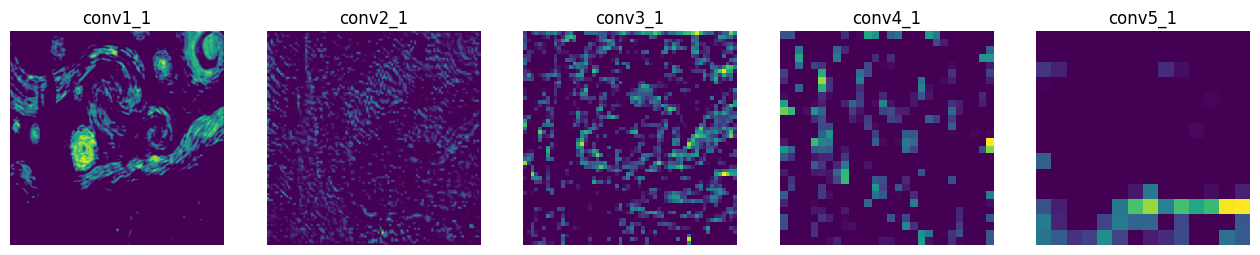

In [90]:
show_outputs(style_outputs)

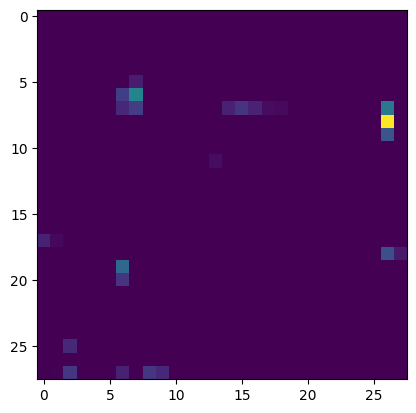

In [104]:
show_outputs(content_outputs)